In [1]:
import os
import numpy as np
import tensorflow as tf
from keras.optimizers import Adam

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

configproto = tf.ConfigProto()
configproto.gpu_options.allow_growth = True
sess = tf.Session(config=configproto)

import _init_path
from UNet import UNet
from inference import inference
from metrics import mean_iou, dice_coef_loss

/home/liushrui/install/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load Data

In [2]:
test_load_path = '../data/stage1_test_data_compressed.npz'

with np.load(test_load_path) as f:
    print(f.files)
    test_images = f['images']
    test_image_shapes = f['shapes']

['images', 'shapes']


# Model

In [4]:
loss = dice_coef_loss
optimizer = Adam(lr=3.e-3, decay=3.e-5)

model = UNet()
model.compile(optimizer=optimizer, loss=loss, metrics=[mean_iou])
model.summary()

model.load_weights('../weights/UNet/180316212643/best.hdf5')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 256, 256, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 256, 256, 16) 0           conv2d_20[0][0]                  
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 256, 256, 16) 2320        dropout_10[0][0]                 
__________________________________________________________________________________________________
max_poolin

In [5]:
test_df = inference(model, test_images=test_images, test_image_shapes=test_image_shapes)

41 images have been resized!
2400 regions found for 65 images


In [6]:
import matplotlib.pyplot as plt
from skimage.io import imread

In [7]:
%matplotlib inline

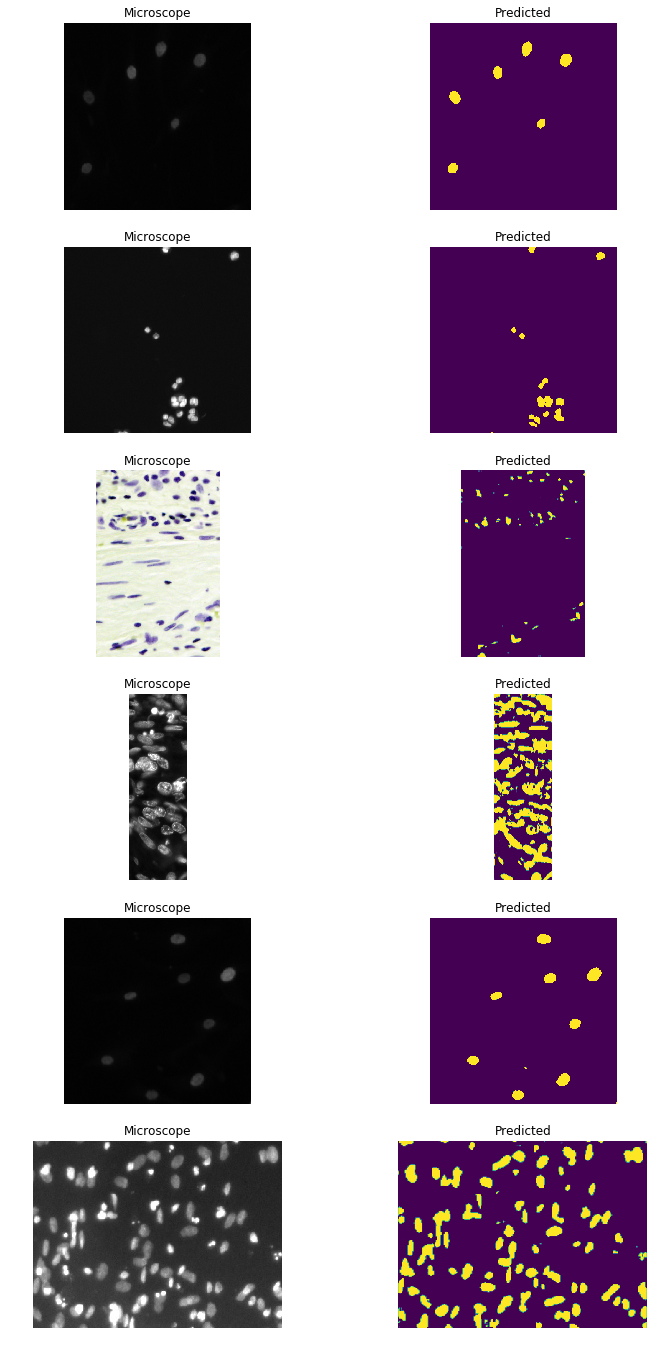

In [8]:
n_img = 6

fig, m_axs = plt.subplots(n_img, 2, figsize = (12, 24))

for (_, d_row), (c_im, c_lab) in zip(test_df.sample(n_img).iterrows(), 
                                     m_axs):
    c_im.imshow(imread(d_row['path']))
    c_im.axis('off')
    c_im.set_title('Microscope')
    
    c_lab.imshow(d_row['mask'])
    c_lab.axis('off')
    c_lab.set_title('Predicted')